# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [3]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

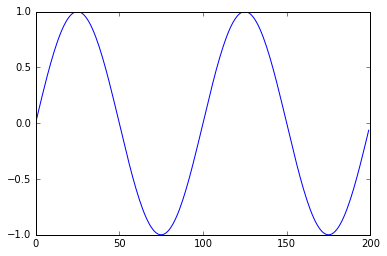

In [20]:
t = np.arange(0, 2, 0.01) 
f = 1
s = np.sin(2*np.pi*f*t)
plt.plot(s)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

<Container object of 3 artists>

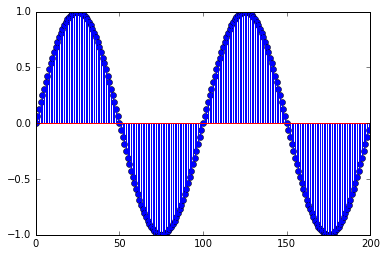

In [40]:
n = np.arange(0, 2, 0.01)
y = np.sin(2*np.pi*n)
plt.stem(y)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

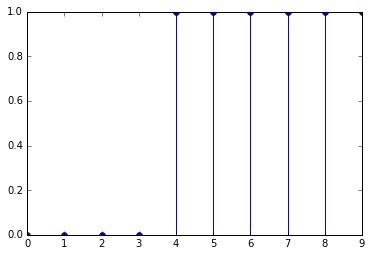

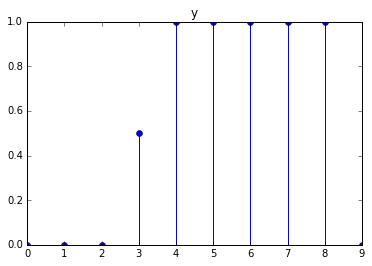

In [44]:
def step(k, N):
    
    s = np.zeros((N,1))
    for n in range(k,N):
        s[n]=1
    return s

N = 10
x = step(4,N)
plt.figure
plt.stem(x)
plt.show()

y = np.zeros(N)
for i in range (0,N-1):
    y[i] = (x[i]+x[i+1])/2

plt.figure
plt.stem(y)
plt.title('y')
plt.show()

**1.2** Propose a modification to obtain a causal version

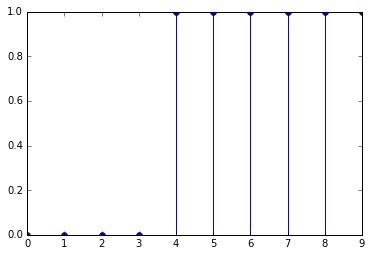

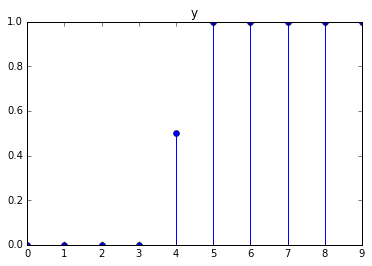

In [46]:
def step(k, N):
    
    s = np.zeros((N,1))
    for n in range(k,N):
        s[n]=1
    return s

N = 10
x = step(4,N)
plt.figure
plt.stem(x)
plt.show()

y = np.zeros(N)
for i in range (0,N-1):
    y[i+1] = (x[i]+x[i+1])/2

plt.figure
plt.stem(y)
plt.title('y')
plt.show()

Comments on your observations

In [47]:
Here I shift y[n] to y[n+1], then the output will be the respnse of the input of present and the past.

SyntaxError: invalid syntax (<ipython-input-47-99a8de29ddfc>, line 1)

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



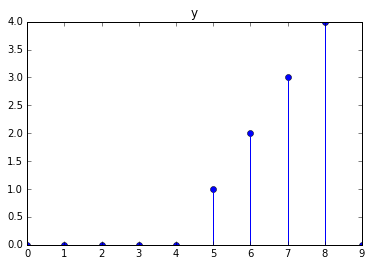

In [53]:
N = 10
x = step(4,N)

def prim(k):
    a=0 
    for j in range (0,k):
        b = x[j]
        a = a+b 
    return a
    
    
    
y = np.zeros(N)
for i in range (0,N-1):
    y[i]=prim(i)  
    
plt.figure
plt.stem(y)
plt.title('y')
plt.show()

In [52]:
The primitive operator is not stable because it is not bounded.


SyntaxError: invalid syntax (<ipython-input-52-0947c08eb8fb>, line 1)

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

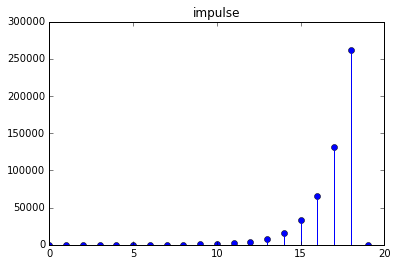

In [59]:
N = 20

y = np.zeros(N)
for i in range (1,N-1):
    y[i] = 1+2*y[i-1]

plt.figure
plt.stem(y)
plt.title('impulse')
plt.show()
    


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

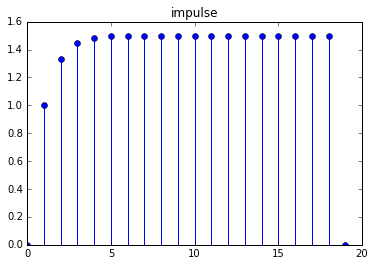

In [60]:
N = 20

y = np.zeros(N)
for i in range (1,N-1):
    y[i] = 1+y[i-1]/3
    

plt.figure
plt.stem(y)
plt.title('impulse')
plt.show()

Comments your observations
The system is stable since it is bounded from 0 to 16.

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


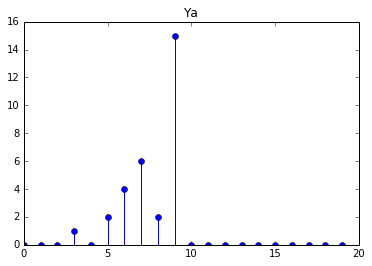

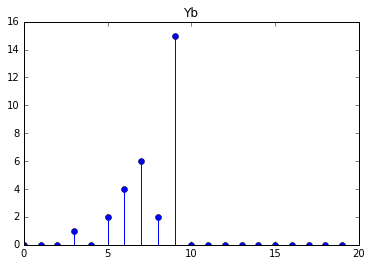

In [39]:
xa=[0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ya = (np.zeros(20))

for i in range (1, 18):
    ya[i] = 3* xa[i-1] -2* xa[i] + xa[i+1]

plt.figure
plt.stem(ya)
plt.title('Ya')
plt.show()

xb=[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0]

yb = (np.zeros(20))

for i in range (1, 18):
    yb[i] = 3* xb[i-1] -2* xb[i] + xb[i+1]

plt.figure
plt.stem(ya)
plt.title('Yb')
plt.show()

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


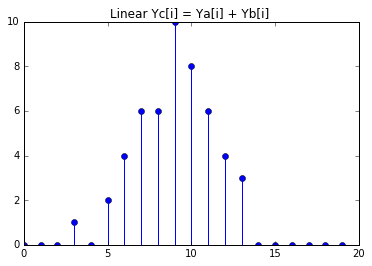

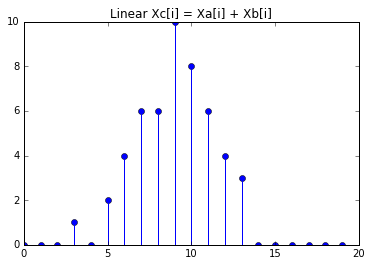

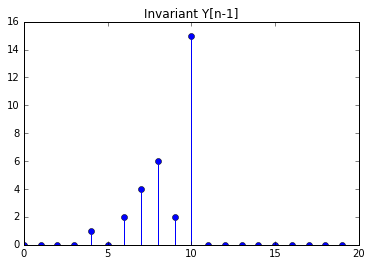

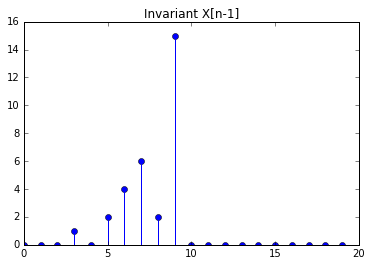

In [42]:
for i in range (0,19):
    xc[i] = xa[i] + xb[i] 
for i in range (0,19):
    yc[i] = ya[i] + yb[i] 

plt.figure
plt.stem(yc)
plt.title('Linear Yc[i] = Ya[i] + Yb[i] ')
plt.show()

yC = (np.zeros(20))
for i in range (1, 18):
    yC[i] = 3* xc[i-1] -2* xc[i] + xc[i+1]
    
plt.figure
plt.stem(yC)
plt.title('Linear Xc[i] = Xa[i] + Xb[i]')
plt.show()


yd = (np.zeros(20))
for i in range (1,19):
    yd[i] = ya[i-1]
yC = (np.zeros(20))
for i in range (1, 18):
    yC[i] = 3* xa[i-1] -2* xa[i] + xa[i+1]


plt.figure
plt.stem(yd)
plt.title('Invariant Y[n-1]')
plt.show()

plt.figure
plt.stem(yC)
plt.title('Invariant X[n-1]')
plt.show()

**3.3** Propose a nonlinear/noninvariant system.

In [ ]:
A nonlinear/noninvariant system:
y[n] = n*x[n] + b*x^3[n]

b*x^3[n] is nonlinear, and n*x[n] is noninvariant
